# **Messi outlier**
## DATASET 2
### "2.2M+ Records -Most Comprehensive Football"

## Exploratory analyses of `player_performances.csv`

`player_performances.csv` is part of a collection called "2.2M+ Records -Most Comprehensive Football" (salimt). The collection is available in [Kaggle](https://www.kaggle.com/datasets/xfkzujqjvx97n/football-datasets).

`player_performances.csv` is a vast list of football players performances by season.

The aim of this notebook is to examine if `player_performances.csv` is suitable to compare Messi performance with other players.

From now on, we use `.parquet` files. `player_performances.csv` was previously transformed to `dataset2_player_performances.parquet`.

#### Route to `player_performances.parquet`

In [2]:
# This chunk is to set the path from the local folder to the player_performances.parquet in the data folder
from pathlib import Path

# project root is one level up from notebooks/
ROOT = Path.cwd().parent
DATA = ROOT / "data"

file_path = DATA / "dataset2_player_performances.parquet"

#### Load `dataset2_player_performances.parquet`, hereafter `df`.

In [3]:
# Load the file
import pandas as pd

# Load the parquet file
df = pd.read_parquet(file_path)

#### Exploratory analyses

In [4]:
# Basic info 
print("Shape:", df.shape)         # rows, columns
print(df.dtypes)                  # types of each column

# Since I want to know time span of the `df` I summarize `season_name` variable

if "season_name" not in df.columns:
    raise KeyError("season_name column not found in dataset")

season_min = df["season_name"].min()
season_max = df["season_name"].max()
unique_seasons = df["season_name"].nunique()
most_freq = df["season_name"].value_counts().idxmax()
most_freq_count = df["season_name"].value_counts().max()

print("📊 season_name summary")
print(f"• Season span: {season_min} → {season_max}")
print(f"• Number of unique seasons: {unique_seasons}")
print(f"• Most frequent season: {most_freq} ({most_freq_count:,} rows)")

# Optional: show counts per season
season_counts = df["season_name"].value_counts().sort_index()
print("\nCounts per season:")
display(season_counts)           

Shape: (1878719, 20)
player_id                int64
season_name             object
competition_id          object
competition_name        object
team_id                  int64
team_name               object
nb_in_group              int64
nb_on_pitch              int64
goals                  float64
assists                  int64
own_goals                int64
subed_in                 int64
subed_out                int64
yellow_cards             int64
second_yellow_cards      int64
direct_red_cards         int64
penalty_goals            int64
minutes_played         float64
goals_conceded           int64
clean_sheets             int64
dtype: object
📊 season_name summary
• Season span: 00/01 → 99/00
• Number of unique seasons: 102
• Most frequent season: 22/23 (106,476 rows)

Counts per season:


season_name
00/01    14657
01/02    17363
02/03    19771
03/04    22753
04/05    25649
         ...  
95/96     5158
96/97     6688
97/98     8803
98/99    10659
99/00    12792
Name: count, Length: 102, dtype: int64

#### Summary

- **760,125 rows × 20 columns**  
- **Unit of observation:** one line per **player × season × competition × team**, aggregating match-level events for that slice (e.g., totals of appearances, goals, cards).  
- **Season coverage (`season_name`):** **1997/98 → 2025/26** (also includes some single-year labels `2000–2026`)  
- **Distinct seasons:** **56**  
- **Most frequent season:** **24/25** (88,010 rows)

**Columns**

- `player_id` — Player identifier.  
- `season_name` — Season label (e.g., `"2003/2004"`, `"24/25"`, sometimes single years like `"2025"`).  
- `competition_id` — Competition code.  
- `competition_name` — Competition name.  
- `team_id` — Team/club identifier for that season/competition.  
- `team_name` — Team/club name.  
- `nb_in_group` — Times named in the matchday squad.  
- `nb_on_pitch` — **Appearances** (played minutes > 0).  
- `goals` — Goals scored.  
- `assists` — Assists.  
- `own_goals` — Own goals.  
- `subed_in` — Times **substituted on**.  
- `subed_out` — Times **substituted off**.  
- `yellow_cards` — Yellow cards.  
- `second_yellow_cards` — Second yellows (leading to red).  
- `direct_red_cards` — Direct red cards.  
- `penalty_goals` — Goals scored from penalties.  
- `minutes_played` — Minutes played (may be `NaN` when unavailable).  
- `goals_conceded` — Goals conceded (primarily relevant for GKs/defensive lines).  
- `clean_sheets` — Clean sheets recorded.  

In [5]:
display(df.head(10))   

,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,own_goals,subed_in,subed_out,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets
0,1,08/09,OBLG,NOFV-Oberliga Süd,4825,FC Eilenburg,9,9,0.0,0,0,0,2,0,0,1,0,NaN,0,0
1,1,07/08,RS,Regionalliga Süd,1526,FSV Ludwigshafen Oggersheim,22,22,1.0,0,0,3,8,1,0,0,0,1580.0,0,0
2,1,06/07,L2,2. Bundesliga,996,TuS Koblenz,10,4,0.0,0,0,4,0,0,0,0,0,NaN,0,0
3,1,06/07,DFB,DFB-Pokal,996,TuS Koblenz,1,0,0.0,0,0,0,0,0,0,0,0,NaN,0,0
4,1,05/06,L2,2. Bundesliga,66,SpVgg Unterhaching,26,14,1.0,1,0,12,1,1,0,0,0,388.0,0,0
5,1,05/06,OL0,Oberliga Bayern,67,SpVgg Unterhaching II,6,6,2.0,0,0,0,2,0,0,0,0,240.0,0,0
6,1,05/06,DFB,DFB-Pokal,66,SpVgg Unterhaching,1,0,0.0,0,0,0,0,0,0,0,0,NaN,0,0
7,1,04/05,L2,2. Bundesliga,66,SpVgg Unterhaching,18,18,2.0,1,0,0,6,0,0,0,0,734.0,0,0
8,1,04/05,DFB,DFB-Pokal,66,SpVgg Unterhaching,1,1,1.0,0,0,0,0,0,0,0,0,90.0,0,0
9,1,03/04,L2,2. Bundesliga,78,VfB Lübeck,26,24,6.0,1,0,7,10,2,0,0,0,260.0,0,0


#### To further examine how much of Messi carreer is considered in the `df`, we filter `player_id`

**IMPORTANT**\
The link between `player_id` and the name of the football player is in `player_profiles.csv`

##### **Lionel Messi**
- player_id = 28003
- player_name = “Lionel Messi”
- player_slug = “lionel-messi”
- Date of birth = 1987-06-24
- Current club = Inter Miami CF

In [6]:
# Apply filter using Messi's player_id
messi_id = 28003
messi_df = df[df["player_id"] == messi_id]

# Basic structure
n_rows, n_cols = messi_df.shape
print(f"Rows (records): {n_rows}")
print(f"Columns: {n_cols}")

# Season range instead of date range
season_min = messi_df["season_name"].min()
season_max = messi_df["season_name"].max()
print(f"Season span: {season_min} → {season_max}")

# Show first 10 rows
messi_df.head(89)

Rows (records): 89
Columns: 20
Season span: 03/04 → 24/25


,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,own_goals,subed_in,subed_out,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets
666791,28003,2025,USMX,Leagues Cup,69261,Inter Miami CF,4,4,2.0,2,0,0,1,1,0,0,1,141.0,0,0
666792,28003,2025,MLS1,MLS,69261,Inter Miami CF,20,19,19.0,8,0,2,0,2,0,0,0,85.0,0,0
666793,28003,2025,KLUB,Club World Cup,69261,Inter Miami CF,4,4,1.0,0,0,0,0,1,0,0,0,360.0,0,0
666794,28003,24/25,CCL,CONCACAF CC,69261,Inter Miami CF,7,7,5.0,1,0,1,1,0,0,0,1,111.0,0,0
666795,28003,2024,POUS,MLS Cup Playoffs,69261,Inter Miami CF,3,3,1.0,1,0,0,0,0,0,0,0,270.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666875,28003,04/05,ES3C,2ª B - Grupo III,2464,FC Barcelona B,17,17,6.0,1,0,0,2,3,0,1,0,253.0,0,0
666876,28003,04/05,ES1,LaLiga,131,FC Barcelona,16,7,1.0,0,0,7,0,0,0,0,0,76.0,0,0
666877,28003,04/05,CL,Champions League,131,FC Barcelona,4,1,0.0,0,0,0,0,0,0,0,0,NaN,0,0
666878,28003,04/05,CDR,Copa del Rey,131,FC Barcelona,1,1,0.0,0,0,0,1,0,0,0,0,NaN,0,0


### ⚽ **Note**
`season_name` coverage spans Messi’s entire career. Therefore, dataset 2 is prefect for comparing Messi’s performance with other players.  

#### We continue describing other variables which we consider KEY as possible filters:

### Competition
There are plenty of soccer players in the dataset, and we just want those players that represent a fair comparisson against Messi. We could narrow the soccer player list by filtering competition. We describe: `competition_id` & `competition_name`

In [7]:
# Competition coverage analysis
if "competition_id" not in df.columns or "competition_name" not in df.columns:
    raise KeyError("competition_id / competition_name columns not found in dataset")

# Number of unique competitions
n_competitions = df["competition_id"].nunique()

# Most frequent competition
most_freq_comp = df["competition_name"].value_counts().idxmax()
most_freq_comp_count = df["competition_name"].value_counts().max()

print("\n📊 competition summary")
print(f"• Number of unique competitions: {n_competitions}")
print(f"• Most frequent competition: {most_freq_comp} ({most_freq_comp_count:,} rows)")

unique_competitions = (
    df[["competition_id", "competition_name"]]
    .drop_duplicates()
    .sort_values("competition_name")
)
print("\nUnique competitions (sample):")
display(unique_competitions.head(20))


📊 competition summary
• Number of unique competitions: 1643
• Most frequent competition: FA Cup (40,958 rows)

Unique competitions (sample):


,competition_id,competition_name
249,PL2,1 Liga
80800,TS1,1. CFL
158990,TS1,1. CSFL
520541,DKRL,1. Div play-off
248455,A1,1. Division
11524,KR1,1. HNL
270236,A4S,1. LL Sbg.
1835,CHC1,1. Liga Gr. 1
1840,CR1,1. Liga Gr. 1 (- 11/12)
46266,CHC2,1. Liga Gr. 2


### One good aproach is to filter by the Big Five divisions

🏆 **Big Five — Top Divisions**

- **Spain** → `ES1` → *LaLiga*  
- **Italy** → `IT1` → *Serie A*  
- **England** → `GB1` → *Premier League*  
- **France** → `FR1` → *Ligue 1*  
- **Germany** → `L1` → *Bundesliga*

The previous codes can be found in `team_details.csv`\
Dicision codes will be important for data curation in a later notebook.

###  Teams

We could narrow the soccer player list by filtering selected teams. We describe the variable `team_name`

In [8]:
if "team_name" not in df.columns:
    raise KeyError("team_name column not found in dataset")

# Number of unique teams
n_teams = df["team_name"].nunique()

# Most frequent team
most_freq_team = df["team_name"].value_counts().idxmax()
most_freq_team_count = df["team_name"].value_counts().max()

print("\n📊 team_name summary")
print(f"• Number of unique teams: {n_teams}")
print(f"• Most frequent team: {most_freq_team} ({most_freq_team_count:,} rows)")

team_counts = df["team_name"].value_counts()
print("\nCounts per team:")
display(team_counts.head(20))


📊 team_name summary
• Number of unique teams: 15411
• Most frequent team: Arsenal FC (4,063 rows)

Counts per team:


team_name
Arsenal FC                          4063
Manchester United                   3890
Rangers FC                          3453
Celtic FC                           3406
Chelsea FC                          3295
Liverpool FC                        3222
SL Benfica                          3186
Sport Club Internacional            3133
CR Flamengo                         3063
Juventus FC                         2940
Sociedade Esportiva Palmeiras       2869
Real Madrid                         2860
FC Barcelona                        2860
Tottenham Hotspur                   2837
Grêmio Foot-Ball Porto Alegrense    2787
Inter Milan                         2758
Manchester City                     2757
Ajax Amsterdam                      2724
São Paulo Futebol Clube             2722
Bayern Munich                       2712
Name: count, dtype: int64

## One possibility is to select players coming from teams inside the big five during Messi activity window

The following info was provided by ChatGPT:
### Teams from the Big Five during Messi’s activity window (2003–2025)

### España — LaLiga (20)

Real Madrid · Barcelona · Atlético de Madrid · Sevilla · Valencia · Villarreal · Athletic Club · Real Sociedad · Real Betis · Celta de Vigo · Getafe · Osasuna · Espanyol · Mallorca · Levante · Rayo Vallecano · Málaga · Deportivo La Coruña · Real Valladolid · Alavés  

### Italia — Serie A (20)

Juventus · Inter · Milan · Roma · Lazio · Napoli · Fiorentina · Atalanta · Udinese · Torino · Sampdoria · Bologna · Genoa · Cagliari · Parma · Chievo Verona · Sassuolo · Hellas Verona · Palermo · Empoli  

### Inglaterra — Premier League (20)

Arsenal · Manchester United · Chelsea · Liverpool · Tottenham Hotspur · Manchester City · Everton · Aston Villa · Newcastle United · West Ham United · Southampton · Leicester City · Fulham · Crystal Palace · West Bromwich Albion · Stoke City · Sunderland · Brighton & Hove Albion · Wolverhampton Wanderers · AFC Bournemouth  

### Francia — Ligue 1 (18)

Paris Saint-Germain · Lyon · Marseille · Lille · Monaco · Rennes · Nice · Bordeaux · Saint-Étienne · Montpellier · Nantes · Toulouse · Lorient · Lens · Reims · Strasbourg · Metz · Caen  

### Alemania — Bundesliga (18)

Bayern München · Borussia Dortmund · Bayer Leverkusen · Schalke 04 · VfL Wolfsburg · VfB Stuttgart · Werder Bremen · Borussia Mönchengladbach · TSG Hoffenheim · 1. FSV Mainz 05 · SC Freiburg · Hertha BSC · FC Augsburg · Hannover 96 · 1. FC Köln · Hamburger SV · Eintracht Frankfurt · RB Leipzig  


In [9]:
### Under construction

### Further exploration of players inside `dataset2_player_performances.parquet`

#### To get the player profiles, we merge the performance and profiles dataset using `player_id` as link

In [10]:
import pandas as pd

# Load datasets (go up one level from notebooks/ to reach data/)
df_perf = pd.read_parquet("../data/dataset2_player_performances.parquet")
df_profiles = pd.read_parquet("../data/dataset2_player_profiles.parquet")

# Merge on player_id
df_merged = df_perf.merge(df_profiles, on="player_id", how="left")

# Save the merged dataset back into data/ or notebooks/
df_merged.to_parquet("../data/merged_player_data.parquet", index=False)

#### Exploration of merged dataset

In [11]:
import pandas as pd

# Load merged dataset
df_merged = pd.read_parquet("../data/merged_player_data.parquet")

# Basic info
print(df_merged.shape)       # rows, columns
print(df_merged.columns[:10])  # first 10 column names

# Quick look at first rows
df_merged.head()

# Check missing values
df_merged.isna().sum().sort_values(ascending=False).head(15)

# Summary statistics for numeric vars
df_merged.describe()

# Example: check merged player info
df_merged.head(5)

(1878719, 53)
Index(['player_id', 'season_name', 'competition_id', 'competition_name',
       'team_id', 'team_name', 'nb_in_group', 'nb_on_pitch', 'goals',
       'assists'],
      dtype='object')


,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,...,on_loan_from_club_id,on_loan_from_club_name,contract_there_expires,second_club_url,second_club_name,third_club_url,third_club_name,fourth_club_url,fourth_club_name,date_of_death
0,1,08/09,OBLG,NOFV-Oberliga Süd,4825,FC Eilenburg,9,9,0.0,0,...,NaN,None,None,None,None,None,None,None,None,None
1,1,07/08,RS,Regionalliga Süd,1526,FSV Ludwigshafen Oggersheim,22,22,1.0,0,...,NaN,None,None,None,None,None,None,None,None,None
2,1,06/07,L2,2. Bundesliga,996,TuS Koblenz,10,4,0.0,0,...,NaN,None,None,None,None,None,None,None,None,None
3,1,06/07,DFB,DFB-Pokal,996,TuS Koblenz,1,0,0.0,0,...,NaN,None,None,None,None,None,None,None,None,None
4,1,05/06,L2,2. Bundesliga,66,SpVgg Unterhaching,26,14,1.0,1,...,NaN,None,None,None,None,None,None,None,None,None


In [12]:
# Show all columns
print(df_merged.columns.tolist())

['player_id', 'season_name', 'competition_id', 'competition_name', 'team_id', 'team_name', 'nb_in_group', 'nb_on_pitch', 'goals', 'assists', 'own_goals', 'subed_in', 'subed_out', 'yellow_cards', 'second_yellow_cards', 'direct_red_cards', 'penalty_goals', 'minutes_played', 'goals_conceded', 'clean_sheets', 'player_slug', 'player_name', 'player_image_url', 'name_in_home_country', 'date_of_birth', 'place_of_birth', 'country_of_birth', 'height', 'citizenship', 'is_eu', 'position', 'main_position', 'foot', 'current_club_id', 'current_club_name', 'joined', 'contract_expires', 'outfitter', 'social_media_url', 'player_agent_id', 'player_agent_name', 'contract_option', 'date_of_last_contract_extension', 'on_loan_from_club_id', 'on_loan_from_club_name', 'contract_there_expires', 'second_club_url', 'second_club_name', 'third_club_url', 'third_club_name', 'fourth_club_url', 'fourth_club_name', 'date_of_death']


In [13]:
import pandas as pd

# Load merged dataset
df_merged = pd.read_parquet("../data/merged_player_data.parquet")

# Aggregate total goals per player and sort
top_scorers = (
    df_merged.groupby("player_name", as_index=False)["goals"]
    .sum()
    .sort_values("goals", ascending=False)
)

# Show the first rows
top_scorers.head(20)

,player_name,goals
15601,Cristiano Ronaldo (8198),796.0
47961,Lionel Messi (28003),771.0
70895,Robert Lewandowski (38253),610.0
50157,Luis Suárez (44352),509.0
86740,Zlatan Ibrahimović (3455),496.0
44032,Karim Benzema (18922),461.0
33900,Hulk (80562),434.0
21877,Edinson Cavani (48280),400.0
32950,Harry Kane (132098),398.0
75301,Sergio Agüero (26399),385.0


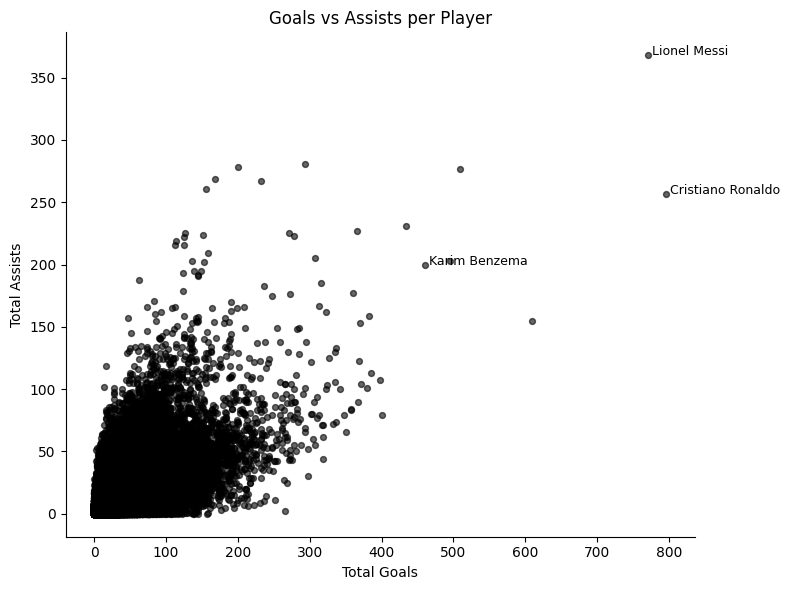

In [14]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Load merged dataset
df_merged = pd.read_parquet("../data/merged_player_data.parquet")

# Aggregate totals per player (goals + assists)
agg = (
    df_merged.groupby("player_name", as_index=False)[["goals", "assists"]]
    .sum()
)

# Helper to strip " (12345)" suffix for labeling
def strip_id(name: str) -> str:
    return re.sub(r"\s*\(\d+\)$", "", name)

# Exact names in your dataset
targets = [
    "Lionel Messi (28003)",
    "Cristiano Ronaldo (8198)",
    "Karim Benzema (18922)",
]

# Scatter (all points identical)
plt.figure(figsize=(8, 6))
plt.scatter(agg["goals"], agg["assists"], alpha=0.6, s=18, color="black")

# Add labels next to the three players
for full_name in targets:
    row = agg.loc[agg["player_name"] == full_name]
    if not row.empty:
        x = float(row["goals"].iloc[0])
        y = float(row["assists"].iloc[0])
        plt.text(x + 5, y, strip_id(full_name), fontsize=9, color="black")

# Minimal styling
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("Total Goals")
plt.ylabel("Total Assists")
plt.title("Goals vs Assists per Player")
plt.tight_layout()
plt.show()

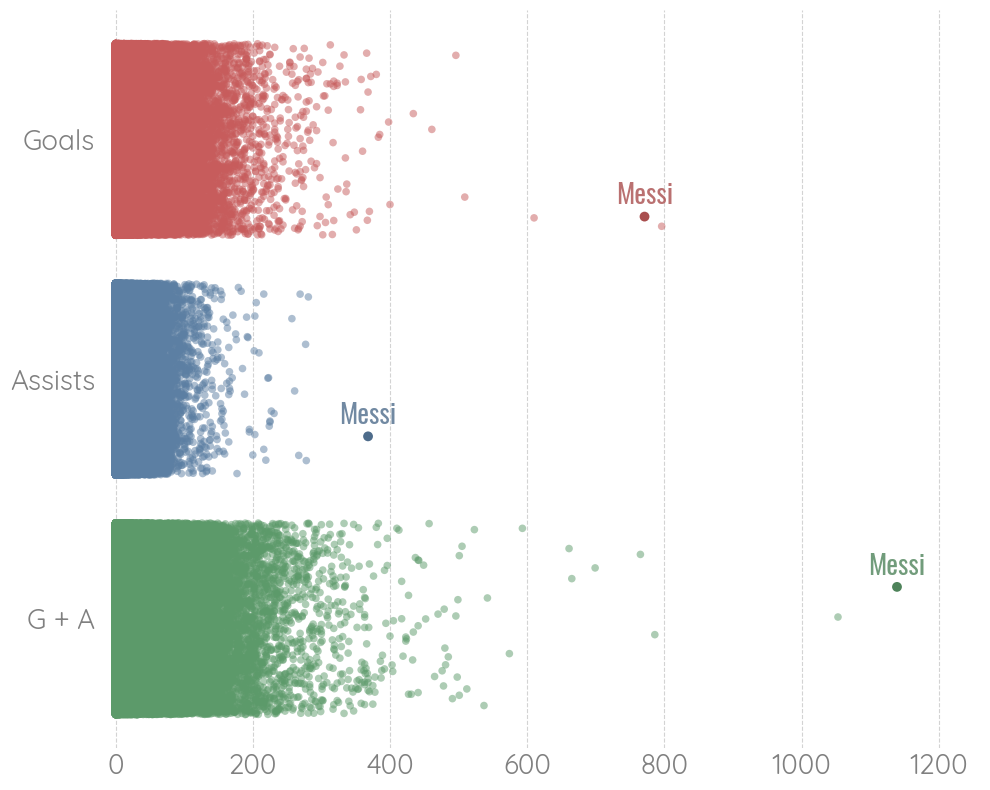

In [61]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from pyfonts import load_font
# Local fonts
oswald = load_font("https://github.com/google/fonts/raw/main/ofl/oswald/Oswald%5Bwght%5D.ttf")
montserrat_reg = load_font("/Users/andresdevegili/Documents/fonts/Montserrat/static/Montserrat-Regular.ttf")
montserrat_med = load_font("/Users/andresdevegili/Documents/fonts/Montserrat/static/Montserrat-Medium.ttf")
inter = load_font("/Users/andresdevegili/Documents/fonts/Inter/static/Inter_18pt-Regular.ttf")
quick_med = load_font("/Users/andresdevegili/Documents/fonts/Quicksand/static/Quicksand-Medium.ttf")
quick_reg = load_font("/Users/andresdevegili/Documents/fonts/Quicksand/static/Quicksand-Regular.ttf")

# Load + aggregate
df_merged = pd.read_parquet("../data/merged_player_data.parquet")
agg = df_merged.groupby("player_name", as_index=False)[["goals", "assists"]].sum()
agg["ga_total"] = agg["goals"] + agg["assists"]

# Find Messi (handles optional ID suffix like " (28003)")
m = agg["player_name"].str.contains(r"^Lionel Messi(?:\s*\(\d+\))?$",
                                    case=False, na=False)
messi_name = agg.loc[m, "player_name"].iloc[0] if m.any() else None

# Long format (ALL DATA, no sampling)
dfp = agg.melt(
    id_vars="player_name",
    value_vars=["goals", "assists", "ga_total"],
    var_name="metric", value_name="value"
).replace({"metric": {
    "goals": "Goals",
    "assists": "Assists",
    "ga_total": "G + A"
}})
dfp["is_messi"] = (dfp["player_name"] == messi_name)

# Map metrics to rows
metric_order = ["G + A", "Assists", "Goals"]
row_map = {m:i for i, m in enumerate(metric_order)}
dfp["_row"] = dfp["metric"].map(row_map).astype(float)

# Jittered strip
rng = np.random.default_rng(123)
jitter = rng.uniform(-0.40, 0.40, size=len(dfp))
ypos = dfp["_row"].to_numpy() + jitter

plt.figure(figsize=(10, 8))

# --- Custom palette: dark pale tones (hex)
DARK_PALE_RED   = "#c75c5c"  # Goals
DARK_PALE_BLUE  = "#5c7fa3"  # Assists
DARK_PALE_GREEN = "#5c9a6a"  # G + A

# Map by metric
color_map = {
    "Goals":   DARK_PALE_RED,
    "Assists": DARK_PALE_BLUE,
    "G + A":   DARK_PALE_GREEN,
}

# Plot ALL other points
mask_other = ~dfp["is_messi"]
plt.scatter(
    dfp.loc[mask_other, "value"],
    ypos[mask_other],
    s=30, alpha=0.5, linewidths=0,
    c=dfp.loc[mask_other, "metric"].map(color_map),
    rasterized=True
)

# Messi highlighted
import matplotlib.colors as mcolors
import numpy as np

def shade(color_hex, factor=0.85):  
    rgb = np.array(mcolors.to_rgb(color_hex))
    return tuple(np.clip(rgb * factor, 0, 1))

# Messi
if dfp["is_messi"].any():
    msk = dfp["is_messi"]

    # Per-point colors (match metric, then darken slightly)
    base_cols = dfp.loc[msk, "metric"].map(color_map).tolist()
    messi_cols = [shade(c, 0.85) for c in base_cols]

    # Scatter Messi points with their per-row darker tones
    plt.scatter(
        dfp.loc[msk, "value"], ypos[msk],
        s=50, c=messi_cols, zorder=3, linewidths=0
    )

    # Label each Messi point with the same per-row color
    for x, y, mc in zip(dfp.loc[msk, "value"], ypos[msk], messi_cols):
        plt.text(x, y + 0.03, "Messi", color=mc, fontsize=20,
                 ha="center", va="bottom", fontproperties=oswald, alpha=0.8)

# Axes & labels
plt.yticks(range(len(metric_order)), metric_order)
plt.xlabel("")
plt.ylabel("")
plt.title("")
#plt.xscale("log")
ax = plt.gca()
xmin, xmax = ax.get_xlim()
ticks = np.array([0, 200, 400, 600, 800, 1000, 1200])
eps = (xmax - xmin) * 1e-3 

for x in ticks:
    xx = x - eps if np.isclose(x, xmax) else x
    ax.axvline(xx, color="lightgray", linestyle="--", linewidth=0.8, zorder=0)
ax.tick_params(
    axis="y",
    pad=-15,                  # distance between swarm and y-labels
    left=False,
    labelleft=True,
    length=0
)
ax.tick_params(
    axis="x",
    bottom=False,
    labelbottom=True,
    length=0
)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(quick_reg)
    label.set_fontsize(20)
    label.set_color("gray")
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=True, length=0)

plt.tight_layout()
plt.savefig("../figs/Messi_outlier_swarmplot.png", dpi=200, bbox_inches="tight")
plt.show()